In [111]:
import pandas as pd
import numpy as np

In [112]:
bookdf = pd.read_csv("/Users/YukiZ./Desktop/565/book_clean_data.csv")

In [113]:
bookdf

,Title,Plot,tokens
0,The Day of the Pelican,The story follows a fictional family named the...,"['story', 'follows', 'fictional', 'family', 'n..."
1,The Lost World of British Communism,The book is composed of a series of essays tha...,"['book', 'composed', 'series', 'essay', 'colle..."
2,Village of Secrets,The book is a narrative regarding the role of ...,"['book', 'narrative', 'regarding', 'role', 're..."
3,Gods Without Men,"Although there are many other settings, both g...","['although', 'many', 'setting', 'geographicall..."
4,The Women of the Cousins' War,The book consists of an introduction by Gregor...,"['book', 'consists', 'introduction', 'gregory'..."
...,...,...,...
18172,La Bastarda,"Okomo, an orphan who was born a bastard and wh...","['okomo', 'orphan', 'born', 'bastard', 'whose'..."
18173,Seeing with the Eyes of Love,The Imitation of Christ is a devotional book w...,"['imitation', 'christ', 'devotional', 'book', ..."
18174,Star Wars Republic Commando: Order 66,Etain Tur-Mukan finally tells Darman that her ...,"['etain', 'finally', 'tell', 'darman', 'son', ..."
18175,Getting It: The Psychology of est,The book is divided into two sections. The fir...,"['book', 'divided', 'two', 'section', 'first',..."


In [123]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
nltk.download('wordnet')
import matplotlib.pyplot as plt
from gensim.models.coherencemodel import CoherenceModel

[nltk_data] Downloading package wordnet to /Users/YukiZ./nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [124]:
##Lemmatization and stemming plus words less than 3 or equals to 3 token cutoff 
def lemmatize_stemming(text, stemmer):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
    
def preprocess(text, stemmer):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    result = []
    for token in word_tokenize(text.lower()):
        eng_stopwords = set(stopwords.words('english'))
        if token not in eng_stopwords and len(token) >= 3:
            result.append(lemmatize_stemming(token, stemmer))
    return result

In [128]:
text = bookdf['Plot']
stemmer = PorterStemmer()
result = []
for i in range(len(text)):
    result.append(preprocess(text[i], stemmer))
result

[['stori',
  'follow',
  'fiction',
  'famili',
  'name',
  'lleshi',
  'lleshi',
  'albanian',
  'famili',
  'live',
  'kosovo',
  'midst',
  'war',
  'famili',
  'suddenli',
  'find',
  'homeless',
  'refuge',
  'middl',
  'violent',
  'war',
  'endur',
  'much',
  'hardship',
  'includ',
  'hunger',
  'ill',
  'danger',
  'journey',
  'escap',
  'situat',
  'surpris',
  'church',
  'group',
  'bring',
  'america',
  'find',
  'small',
  'town',
  'vermont',
  'event',
  'septemb',
  'take',
  'place',
  'place',
  'challeng',
  'path',
  'muslim',
  'famili'],
 ['book',
  'compos',
  'seri',
  'essay',
  'collect',
  'togeth',
  'mark',
  'ten',
  'year',
  'anniversari',
  'samuel',
  'death',
  'describ',
  'develop',
  'british',
  'communist',
  'parti',
  'experi',
  'member',
  'vantag',
  'point',
  'three',
  'essay',
  'work',
  'publish',
  'new',
  'leav',
  'review',
  'book',
  'engag',
  'number',
  'differ',
  'aspect',
  'commun',
  'britain',
  'exampl',
  'way',
  

In [135]:
## Bag of Words Prep
dictionary = gensim.corpora.Dictionary(result)

In [136]:
##If remove very rare and very common words
# - words appearing less than 3 times
# - words appearing in more than 10% of all documents
# - words appearing frequently rank before 10th 
#dictionary.filter_extremes(no_below=3, no_above=0.1, keep_n= 10)

In [156]:
bow_corpus = [dictionary.doc2bow(doc) for doc in result]
bow_corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 4),
 (10, 1),
 (11, 2),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 1),
 (22, 2),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 2),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 1),
 (35, 1),
 (36, 1),
 (37, 1),
 (38, 1),
 (39, 1),
 (40, 1),
 (41, 2)]

In [138]:
## Preview the bag of words result for first book plot 
bow_doc_x = bow_corpus[0]

for i in range(len(bow_doc_x)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
                                                     dictionary[bow_doc_x[i][0]], 
                                                     bow_doc_x[i][1]))

Word 0 ("albanian") appears 1 time.
Word 1 ("america") appears 1 time.
Word 2 ("bring") appears 1 time.
Word 3 ("challeng") appears 1 time.
Word 4 ("church") appears 1 time.
Word 5 ("danger") appears 1 time.
Word 6 ("endur") appears 1 time.
Word 7 ("escap") appears 1 time.
Word 8 ("event") appears 1 time.
Word 9 ("famili") appears 4 time.
Word 10 ("fiction") appears 1 time.
Word 11 ("find") appears 2 time.
Word 12 ("follow") appears 1 time.
Word 13 ("group") appears 1 time.
Word 14 ("hardship") appears 1 time.
Word 15 ("homeless") appears 1 time.
Word 16 ("hunger") appears 1 time.
Word 17 ("ill") appears 1 time.
Word 18 ("includ") appears 1 time.
Word 19 ("journey") appears 1 time.
Word 20 ("kosovo") appears 1 time.
Word 21 ("live") appears 1 time.
Word 22 ("lleshi") appears 2 time.
Word 23 ("middl") appears 1 time.
Word 24 ("midst") appears 1 time.
Word 25 ("much") appears 1 time.
Word 26 ("muslim") appears 1 time.
Word 27 ("name") appears 1 time.
Word 28 ("path") appears 1 time.
Word

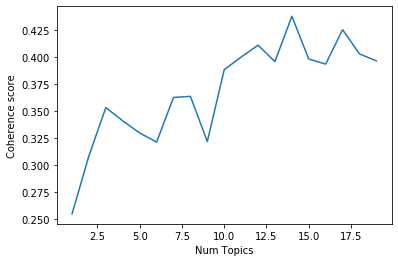

In [142]:
##Coherence plot for LDA topic modeling CV
def scores_plot():
    scores = []
    for i in range(1,20):
        lda_model = gensim.models.ldamodel.LdaModel(bow_corpus, 
                                                num_topics=i, 
                                                id2word=dictionary, 
                                                passes=2)
        cm = CoherenceModel(model=lda_model,texts = result, corpus=bow_corpus, coherence='c_v')
        coherence = cm.get_coherence()
        scores.append(coherence)
    limit=20; start=1; step=1;
    x = range(start, limit, step)
    plt.plot(x, scores)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")

scores_plot()
##Roughly 14 is optimist # of topics 

In [175]:
def lda_model(i, bow_corpus, dictionary):
    lda_model = gensim.models.ldamodel.LdaModel(bow_corpus, 
                                            num_topics=i,
                                            id2word=dictionary, 
                                            passes=2)
    return lda_model

In [143]:
lda_model14 = lda_model(14, bow_corpus, dictionary)

In [145]:
# print 14 topics
for idx, topic in lda_model14.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.018*"murder" + 0.012*"investig" + 0.008*"find" + 0.008*"polic" + 0.007*"kill" + 0.006*"case" + 0.004*"crime" + 0.004*"death" + 0.004*"london" + 0.004*"offic"
Topic: 1 
Words: 0.019*"book" + 0.013*"stori" + 0.012*"novel" + 0.010*"charact" + 0.009*"includ" + 0.008*"first" + 0.006*"chapter" + 0.006*"also" + 0.006*"write" + 0.005*"section"
Topic: 2 
Words: 0.036*"doctor" + 0.010*"harri" + 0.009*"time" + 0.009*"barbara" + 0.009*"use" + 0.008*"find" + 0.007*"take" + 0.007*"return" + 0.006*"kill" + 0.006*"destroy"
Topic: 3 
Words: 0.009*"get" + 0.008*"find" + 0.008*"one" + 0.007*"take" + 0.007*"tell" + 0.006*"leav" + 0.006*"go" + 0.006*"day" + 0.005*"back" + 0.005*"home"
Topic: 4 
Words: 0.015*"king" + 0.014*"magic" + 0.008*"find" + 0.007*"queen" + 0.007*"castl" + 0.007*"dragon" + 0.006*"power" + 0.006*"take" + 0.005*"return" + 0.005*"lord"
Topic: 5 
Words: 0.010*"kill" + 0.009*"find" + 0.008*"jack" + 0.006*"flavia" + 0.006*"tell" + 0.005*"vampir" + 0.005*"one" + 0.005*"hel

In [146]:
def format_topics_sentences(lda_model, bow_corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(lda_model[bow_corpus]):
        row = row_list[0] if lda_model.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = lda_model.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [148]:
# Calculate each document sentence dominant topic and contribution
final_result = format_topics_sentences(lda_model14,bow_corpus, text )
final_result

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Plot
0,8.0,0.6783,"love, famili, becom, father, mother, live, lif...",The story follows a fictional family named the...
1,11.0,0.4368,"book, chapter, work, state, peopl, also, use, ...",The book is composed of a series of essays tha...
2,6.0,0.3960,"war, earth, human, planet, world, forc, time, ...",The book is a narrative regarding the role of ...
3,10.0,0.4379,"govern, state, compani, presid, unit, feder, c...","Although there are many other settings, both g..."
4,1.0,0.4096,"book, stori, novel, charact, includ, first, ch...",The book consists of an introduction by Gregor...
...,...,...,...,...
18172,8.0,0.7194,"love, famili, becom, father, mother, live, lif...","Okomo, an orphan who was born a bastard and wh..."
18173,11.0,0.5822,"book, chapter, work, state, peopl, also, use, ...",The Imitation of Christ is a devotional book w...
18174,6.0,0.6500,"war, earth, human, planet, world, forc, time, ...",Etain Tur-Mukan finally tells Darman that her ...
18175,11.0,0.8533,"book, chapter, work, state, peopl, also, use, ...",The book is divided into two sections. The fir...


In [149]:
def sentence_keyword(final_result):
    con = final_result.groupby("Dominant_Topic")
    new = pd.DataFrame()
    for i, grp in con:
        new = pd.concat([new, grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                                axis=0)
    new.reset_index(drop=True, inplace=True)
    new.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]
    new = new.drop(['Topic_Perc_Contrib'], axis=1)
    return new

In [151]:
# Find the most representative sentence to the topics
sentence_keyword14 = sentence_keyword(final_result)
sentence_keyword14

,Topic_Num,Keywords,Text
0,0.0,"murder, investig, find, polic, kill, case, cri...",This book has two plots. The primary plot conc...
1,1.0,"book, stori, novel, charact, includ, first, ch...",Divine Worship: The Missal opens with the decr...
2,2.0,"doctor, harri, time, barbara, use, find, take,...",An unknown entity uses the Time Scoop to bring...
3,3.0,"get, find, one, take, tell, leav, go, day, bac...",Elmer is an elf who lives with a family of bak...
4,4.0,"king, magic, find, queen, castl, dragon, power...",An young Conan finds himself involved in a plo...
5,5.0,"kill, find, jack, flavia, tell, vampir, one, h...","In Los Angeles, Gavin Quick and his girlfriend..."
6,6.0,"war, earth, human, planet, world, forc, time, ...",Luke Skywalker leads a Jedi mission to find th...
7,7.0,"batman, obrien, rachel, chomski, carver, jake,...",The books starts with the arrival of Muhammad ...
8,8.0,"love, famili, becom, father, mother, live, lif...","Originally entitled Emily, it tells the story ..."
9,9.0,"kill, ship, find, attack, take, return, one, e...","The setting is a valley called the Sink, which..."


In [ ]:
################### ---- LSA ---- #################

In [195]:
from gensim.test.utils import common_dictionary, common_corpus
from gensim.models import LsiModel
from gensim import corpora, models

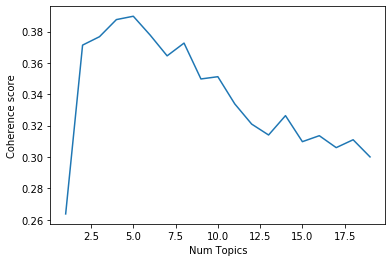

In [172]:
def scores_plot():
    scores = []
    for i in range(1,20):
        lsa_model = LsiModel(bow_corpus, 
                             num_topics=i, 
                             id2word=dictionary)
        cm = CoherenceModel(model= lsa_model,texts = result, corpus=bow_corpus, coherence='c_v')
        coherence = cm.get_coherence()
        scores.append(coherence)
    limit=20; start=1; step=1;
    x = range(start, limit, step)
    plt.plot(x, scores)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
scores_plot()

In [196]:
def lsa_model(i, bow_corpus, dictionary):
    lsa_model = models.LsiModel(bow_corpus, 
                         num_topics=i,
                         id2word=dictionary)
    return lsa_model

In [197]:
lsa_model5 = lsa_model(5, bow_corpus, dictionary)

In [203]:
for idx, topic in lsa_model5.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.216*"find" + 0.186*"take" + 0.178*"one" + 0.146*"leav" + 0.134*"tell" + 0.134*"time" + 0.132*"kill" + 0.130*"make" + 0.121*"return" + 0.116*"becom"
Topic: 1 
Words: 0.729*"doctor" + 0.138*"tardi" + -0.133*"mother" + -0.129*"famili" + -0.127*"father" + 0.122*"ship" + 0.116*"kill" + 0.107*"use" + -0.093*"love" + 0.093*"find"
Topic: 2 
Words: -0.270*"book" + 0.194*"tell" + -0.182*"world" + 0.179*"find" + -0.179*"human" + 0.173*"doctor" + -0.138*"war" + 0.137*"get" + 0.133*"mother" + -0.132*"state"
Topic: 3 
Words: -0.512*"doctor" + 0.270*"kill" + -0.217*"book" + 0.146*"ship" + -0.144*"time" + 0.139*"find" + -0.135*"mother" + 0.128*"attack" + -0.126*"stori" + -0.126*"famili"
Topic: 4 
Words: -0.283*"book" + 0.221*"father" + -0.214*"get" + 0.202*"famili" + -0.187*"find" + -0.178*"tell" + 0.171*"becom" + 0.161*"son" + 0.144*"marri" + -0.138*"go"
